In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

current_font_list = matplotlib.rcParams['font.family']
font_path = "C:\Windows\Fonts\gulim.ttc"
kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont] + current_font_list



In [2]:
pd_data = pd.read_csv('park.csv')
pd_data

,지자체명,공원구분,공원명,위도,경도,공원면적,지정고시일
0,서울특별시,소공원,녹색소공원,37.539217,126.962694,1569.9,2012-10-19
1,세종특별자치시,소공원,푸름샘 소공원(소1-1),36.516117,127.233781,1820.0,2011-08-05
2,세종특별자치시,소공원,솔숲 소공원(소1-2),36.508995,127.230040,1037.0,2011-08-05
3,세종특별자치시,수변공원,마디꽃 수변공원(수1-1),36.495962,127.257316,4928.0,2007-07-04
4,세종특별자치시,수변공원,꽃 수변공원(수2-3),36.473133,127.254482,3575.0,2009-01-07
...,...,...,...,...,...,...,...
17576,서울특별시,기타,방배,37.474225,126.995298,210517.2,NaN
17577,서울특별시,기타,말죽거리,37.480885,127.030469,280822.6,NaN
17578,서울특별시,근린공원,서리풀,37.484654,127.000420,465938.3,NaN
17579,서울특별시,근린공원,방배,37.470535,126.989600,74847.6,NaN


### heatmap
* 지자체명 vs. 공원구분
    - 평균 공원면적
    - 공원 갯수, 결측치 0처리

In [3]:
park_mean = pd_data.groupby(['지자체명', '공원구분']).mean().round(0)

park_mean.reset_index()
park_mean.drop(['위도', '경도'], axis = 1, inplace=True)


park_mean = park_mean.reset_index()
df1 = park_mean.pivot('지자체명', '공원구분', '공원면적')

C:\Users\ITPS\AppData\Local\Temp\ipykernel_7884\1158728118.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  park_mean = pd_data.groupby(['지자체명', '공원구분']).mean().round(0)
C:\Users\ITPS\AppData\Local\Temp\ipykernel_7884\1158728118.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df1 = park_mean.pivot('지자체명', '공원구분', '공원면적')


<AxesSubplot: xlabel='공원구분', ylabel='지자체명'>

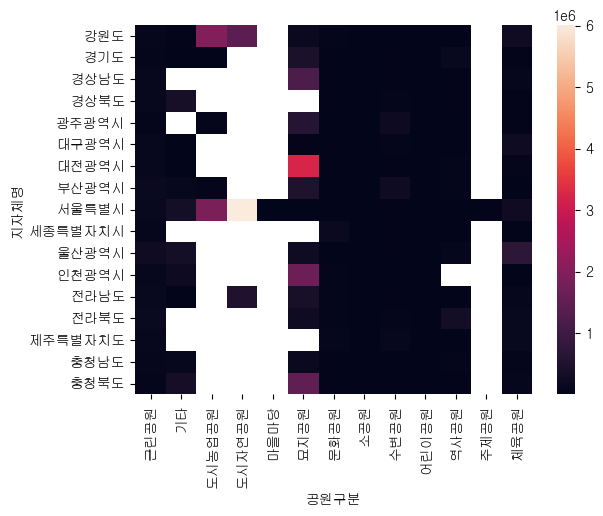

In [4]:
sns.heatmap(df1)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_7884\1474549012.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_group_pv = df_group.reset_index().pivot('지자체명', '공원구분', '공원명')


<AxesSubplot: xlabel='공원구분', ylabel='지자체명'>

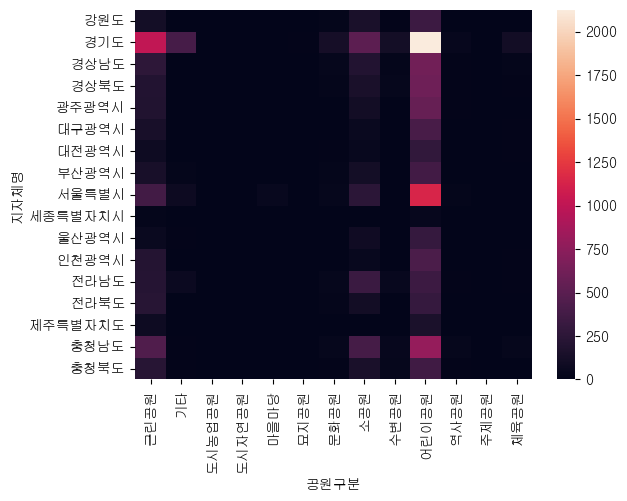

In [13]:
pd_data['지자체명'] = pd_data['지자체명'].astype('category')
pd_data['공원구분'] = pd_data['공원구분'].astype('category')
pd_data.dtypes

g1 = pd_data.groupby(['지자체명', '공원구분'])
df_group = g1.count()
df_group
df_group_pv = df_group.reset_index().pivot('지자체명', '공원구분', '공원명')
sns.heatmap(df_group_pv)